In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
1,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
2,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
3,22,80,98,121,39,53,94,100,107,110,...,234,229,234,235,238,241,242,244,246,246
4,20,127,127,128,130,132,133,133,133,135,...,49,151,154,151,150,149,147,145,144,143


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
1,21,128,131,133,135,137,139,140,142,145,...,131,130,73,45,61,76,84,85,65,66
2,22,31,59,78,82,86,90,94,105,119,...,142,114,93,86,119,184,198,200,200,199
3,2,197,197,197,198,199,199,199,198,199,...,244,245,244,243,243,242,241,240,239,238
4,21,130,133,137,141,143,145,147,149,150,...,137,188,180,182,180,179,178,175,176,174


In [5]:
train.shape

(5622, 785)

In [6]:
labels = train['label'].values

In [7]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 1,  2, 20, 21, 22], dtype=int64)

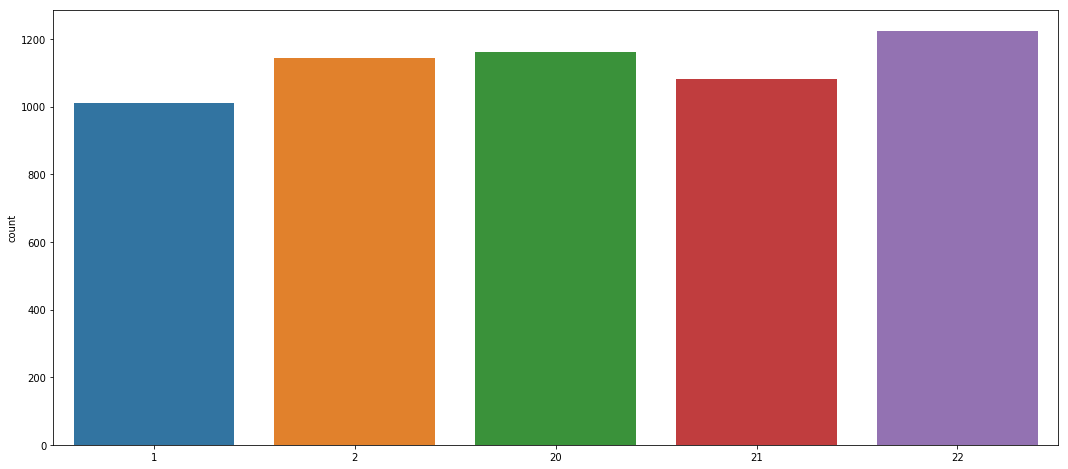

In [8]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [9]:
train.drop('label', axis = 1, inplace = True)

In [10]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [24]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [25]:
labels

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]])

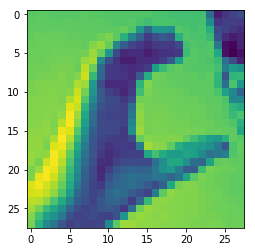

In [26]:
plt.imshow(images[0].reshape(28,28))

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3)

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [30]:
x_train = x_train / 255
x_test = x_test / 255

In [31]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [32]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

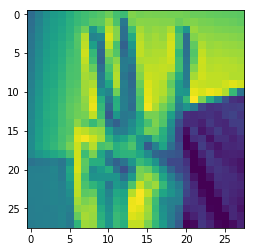

In [33]:
plt.imshow(x_train[0].reshape(28,28))

In [34]:
batch_size = 32
num_classes = 5
epochs = 10

In [35]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [36]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [37]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Train on 3935 samples, validate on 1687 samples
Epoch 1/10
3935/3935 [==============================] - 6s 1ms/step - loss: 1.2706 - acc: 0.4122 - val_loss: 0.8393 - val_acc: 0.6271
Epoch 2/10
3935/3935 [==============================] - 5s 1ms/step - loss: 0.5690 - acc: 0.7654 - val_loss: 0.2830 - val_acc: 0.8992
Epoch 3/10
3935/3935 [==============================] - 5s 1ms/step - loss: 0.1705 - acc: 0.9476 - val_loss: 0.0964 - val_acc: 0.9751
Epoch 4/10
3935/3935 [==============================] - 5s 1ms/step - loss: 0.0498 - acc: 0.9875 - val_loss: 0.0493 - val_acc: 0.9834
Epoch 5/10
3935/3935 [==============================] - 5s 1ms/step - loss: 0.0200 - acc: 0.9959 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 6/10
3935/3935 [==============================] - 5s 1ms/step - loss: 0.0136 - acc: 0.9975 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 7/10
3935/3935 [==============================] - 5s 1ms/step - loss: 0.0041 - acc: 1.0000 - v

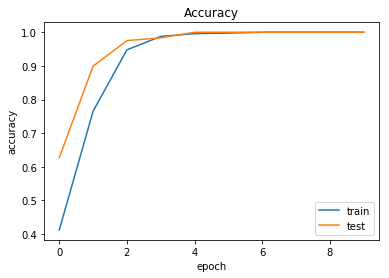

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [39]:
test_labels = test['label']

In [40]:
test.drop('label', axis = 1, inplace = True)

In [41]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [42]:
test_labels = label_binrizer.fit_transform(test_labels)

In [43]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [44]:
test_images.shape

(1560, 28, 28, 1)

In [45]:
y_pred = model.predict(test_images)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(test_labels, y_pred.round())

0.9333333333333333

In [51]:
model.save('project1.h5')